In [ ]:
#Heart Disease Prediction using Logistic regression
'''
step1: Data colllection and Loading the data 
step2: Data CLeaning
step3: Explore + visualize data (check missing values, class balance, correlations)
step4: Data splitting
step5: Model Training
step6: Evaluate using accuracy, precision, recall, confusion matrix
step7: Prediction
'''

In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\AARUSHI TANDON\Downloads\heart_cleveland_upload.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [3]:
df=df.dropna()

In [8]:
#number of females with heart condition
women_patient=df[(df['sex']==0) & (df['condition']==1)]
count_women=len(women_patient)
print(count_women)

25


In [10]:
#number of males with heart condition
men_patient=df[(df['sex']==1) & (df['condition']==1)]
count_men=len(men_patient)
print(count_men)

112


In [ ]:
import matplotlib.pyplot as plt
# Data for plot
labels = ['Females', 'Males']
counts = [count_women, count_men]

# Plot
plt.bar(labels, counts, color=['pink', 'lightblue'])
plt.title('Number of Patients with Heart Condition by Sex')
plt.ylabel('Count')
plt.show()



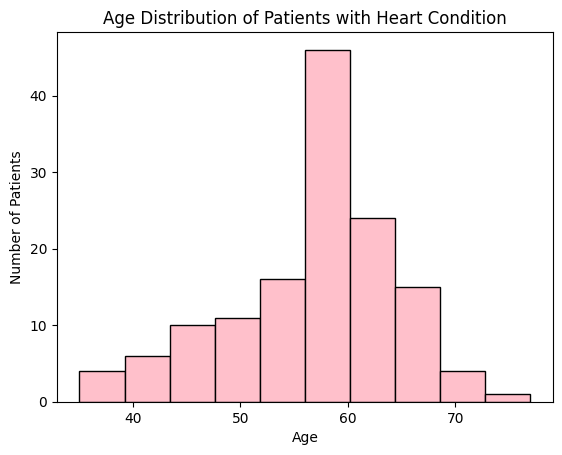

In [20]:
#Histogram of age distribution with heart condition
ages_with=df[df['condition']==1]['age']
plt.hist(ages_with, bins=10, color='pink', edgecolor='black')
plt.title('Age Distribution of Patients with Heart Condition')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

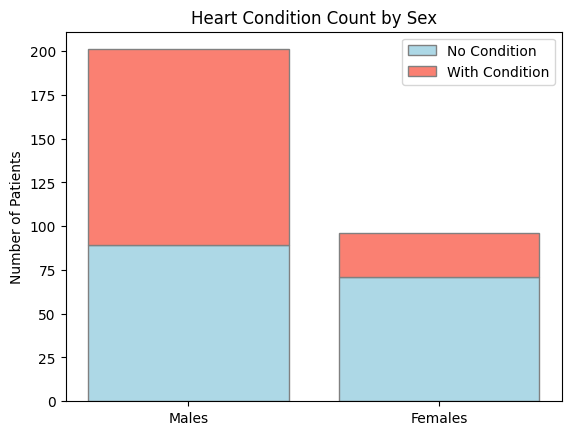

In [31]:
import numpy as np

male_no = len(df[(df['sex'] == 1) & (df['condition'] == 0)])
male_yes = len(df[(df['sex'] == 1) & (df['condition'] == 1)])
female_no = len(df[(df['sex'] == 0) & (df['condition'] == 0)])
female_yes = len(df[(df['sex'] == 0) & (df['condition'] == 1)])

labels = ['Males', 'Females']
no_condition = [male_no, female_no]
with_condition = [male_yes, female_yes]

barWidth = 0.5
r = np.arange(len(labels))

plt.bar(r, no_condition, color='lightblue', edgecolor='grey', label='No Condition')
plt.bar(r, with_condition, bottom=no_condition, color='salmon', edgecolor='grey', label='With Condition')

plt.xticks(r, labels)
plt.ylabel('Number of Patients')
plt.title('Heart Condition Count by Sex')
plt.legend()
plt.show()


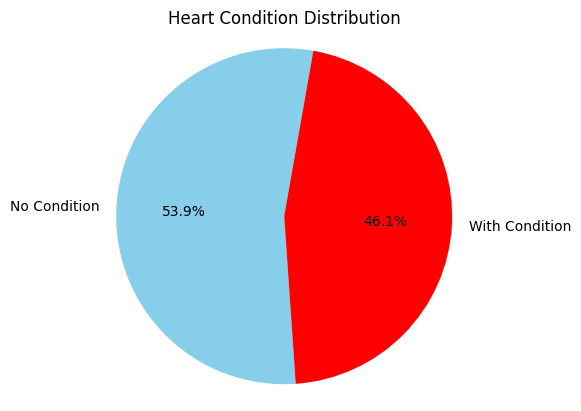

In [30]:
#Pie chart of number of patients with condition
counts = df['condition'].value_counts()
labels = ['No Condition', 'With Condition']
colors = ['skyblue', 'red']

plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=80)
plt.title('Heart Condition Distribution')
plt.axis('equal')  # Circle pie
plt.show()

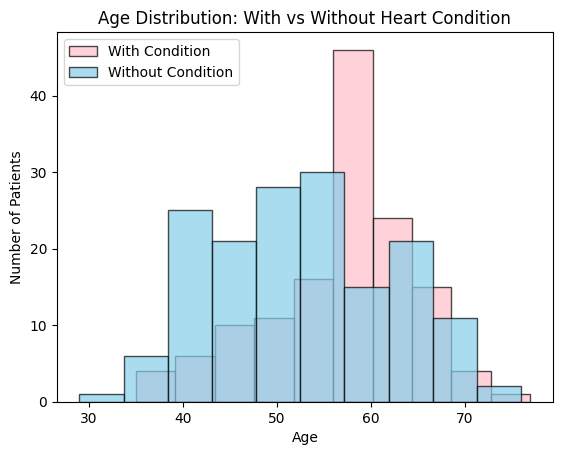

In [17]:
#Histogram comparing with vs without heart condition
ages_with = df[df['condition'] == 1]['age']
ages_without = df[df['condition'] == 0]['age']

plt.hist(ages_with, bins=10, alpha=0.7, label='With Condition', color='pink', edgecolor='black')
plt.hist(ages_without, bins=10, alpha=0.7, label='Without Condition', color='skyblue', edgecolor='black')

plt.title('Age Distribution: With vs Without Heart Condition')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()


C:\Users\AARUSHI TANDON\AppData\Local\Temp\ipykernel_17420\1821049247.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ages_data, labels=labels, patch_artist=True,


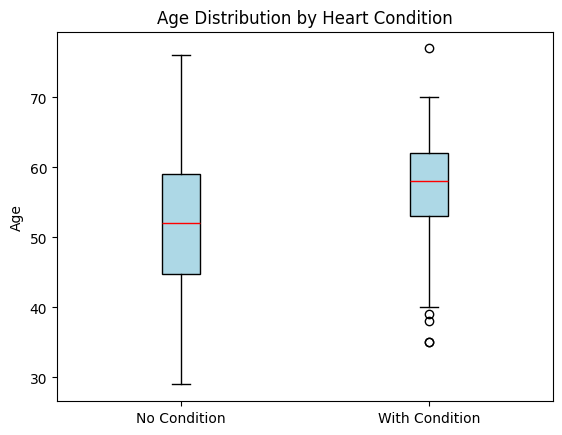

In [16]:
#Boxplot for age (heart condition vs no heart condition)
ages_data = [df[df['condition'] == 0]['age'], df[df['condition'] == 1]['age']]
labels = ['No Condition', 'With Condition']

plt.boxplot(ages_data, labels=labels, patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'))
plt.title('Age Distribution by Heart Condition')
plt.ylabel('Age')
plt.show()


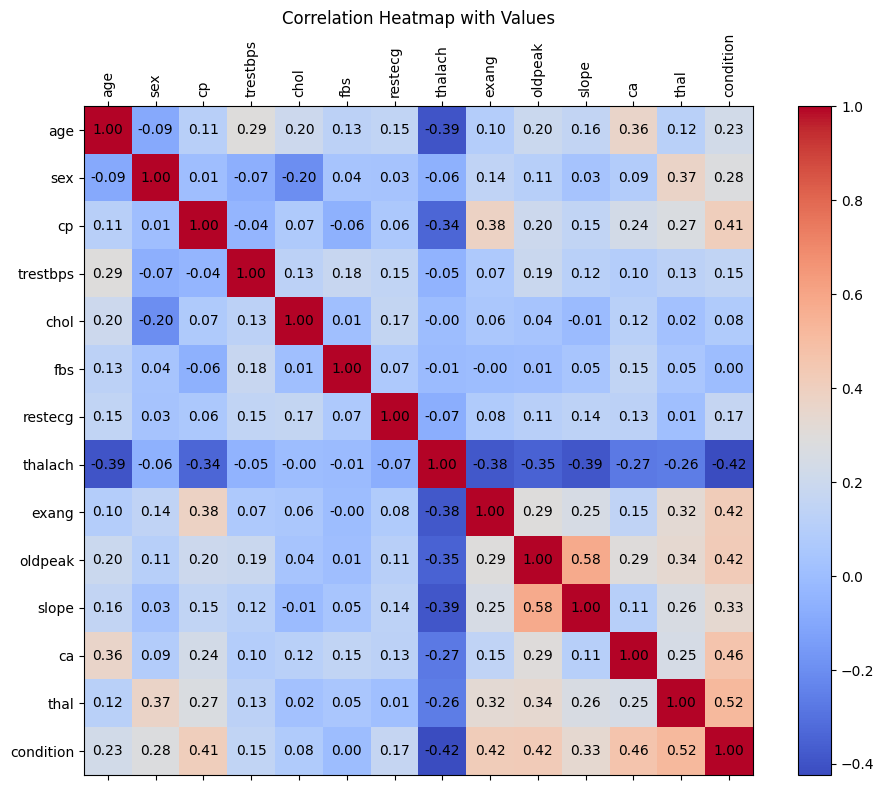

In [26]:
import matplotlib.pyplot as plt
import numpy as np

corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))

cax = ax.matshow(corr, cmap='coolwarm', interpolation='none')
fig.colorbar(cax)

# Set ticks and labels
ticks = np.arange(len(corr.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = f"{corr.iloc[i, j]:.2f}"  # format number to 2 decimals
        ax.text(j, i, text, ha='center', va='center', color='black')

plt.title('Correlation Heatmap with Values')
plt.tight_layout()
plt.show()


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate features and target
X = df.drop('condition', axis=1)
y = df['condition']

# 2. Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale features - fit scaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 4. Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)

print("Train features shape:", X_train_scaled.shape)
print("Test features shape:", X_test_scaled.shape)


Train features shape: (237, 13)
Test features shape: (60, 13)


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define model
model = LogisticRegression()

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],              # Type of regularization (L1 = Lasso, L2 = Ridge)
    'solver': ['liblinear']               # solver supporting l1 penalty
}

# Setup GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Run grid search on training data
grid.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

# Use best model to predict test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.8687943262411348
Test Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.69      0.79      0.73        28

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create DMatrix (optimized data structure for XGBoost)
# Or simply use X_train_scaled and X_test_scaled directly with sklearn API

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
